1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [2]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

<ipython-input-3-0153d39b8e94>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tsne_df['label'].replace(0.0, 'Malignant', inplace=True)


label
Benign       357
Malignant    212
Name: count, dtype: int64


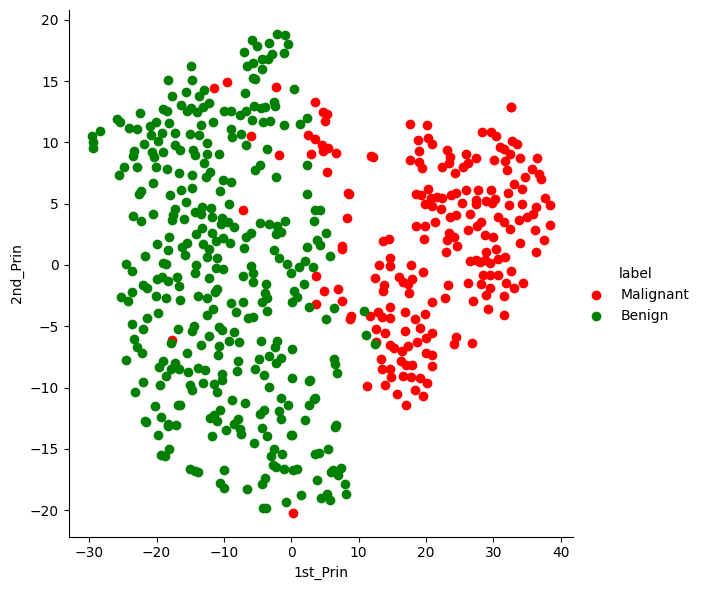

In [3]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# According to the PCA code attachted
# Normalize data
raw_data = my_data.data
normalized_data = StandardScaler().fit_transform(raw_data)

# Apply TSNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(normalized_data)

# Create DataFrame
tsne_df = pd.DataFrame(np.vstack((tsne_data.T, my_data.target)).T,
                       columns=['1st_Prin', '2nd_Prin', 'label'])

# Replace 0 with Malignant and 1 with Benign
tsne_df['label'].replace(0.0, 'Malignant', inplace=True)
tsne_df['label'].replace(1.0, 'Benign', inplace=True)

# Check the count of label
print(tsne_df.label.value_counts())

# Create Plot
pal = dict(Malignant="red", Benign="green")

ax= sns.FacetGrid(tsne_df, hue='label', height=6, palette=pal,
              hue_order=["Malignant", "Benign"]).\
    map(plt.scatter, '1st_Prin', '2nd_Prin').\
    add_legend()

plt.show()

3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [4]:

from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(...)

X = my_data.data  # Features
y = my_data.target  # Labels  0-Malignant 1-Benign

scaler = StandardScaler() # normalized data
Cancer_fit = scaler.fit_transform(X) # calculates the average and standard deviation and performs the normalization on the data.

# Split the data
test_split = 0.2  # 20% of the data for testing

X_train, X_test, y_train, y_test = train_test_split(Cancer_fit, y, test_size=test_split)


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

decision_tree = DecisionTreeClassifier(
criterion="gini", random_state=100, max_depth=5, min_samples_leaf=7)

decision_tree.fit(X_train, y_train) # train the model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=100)

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# model_random_forest = RandomForestClassifier(...)
# model_random_forest.fit(...)

# Step 1: Initialize the Random Forest model
random_forest = RandomForestClassifier(
    n_estimators=300,
    criterion="entropy",
    max_depth=12,
    min_samples_split=5,
)

random_forest.fit(X_train, y_train) # train the model


RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=5,
                       n_estimators=300)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [7]:
from sklearn.ensemble import AdaBoostClassifier

# model_adaboost = AdaBoostClassifier(...)
# model_adaboost.fit(...)

adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=150,
    learning_rate=0.35,
)

adaboost.fit(X_train, y_train) # train the model

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.35, n_estimators=150)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Predict on the test data for each model
predict_decisiont = decision_tree.predict(X_test)
predict_randomf = random_forest.predict(X_test)
predict_adab = adaboost.predict(X_test)

# Evaluate each model
def evaluate_model(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name}:")
    print(f"Accuracy:{accuracy:}")
    print(f"Precision:{precision:}")
    print(f"Recall:{recall:}")
    print(f"F1 Score:{f1:}")
    print(f"Confusion Matrix:")
    print(cm)
    return accuracy, precision, recall, f1

# Evaluate Decision Tree
metrics_dt = evaluate_model("Decision Tree", y_test, predict_decisiont)

# Evaluate Random Forest
metrics_rf = evaluate_model("Random Forest", y_test, predict_randomf)

# Evaluate AdaBoost
metrics_ab = evaluate_model("AdaBoost", y_test, predict_adab)

# Choose the decisive metric
print("\nThe metrics Results")
results = {
    "Decision Tree": metrics_dt,
    "Random Forest": metrics_rf,
    "AdaBoost": metrics_ab }

print("Model Comparison based on F1:")
# Compare according to F1 score-index 3
winner = max(results, key=lambda model: results[model][3])
for model, scores in results.items():
    print(f"{model}: F1 Score = {scores[3]:}")

print(f"\nThe winner is: {winner}!")


#


Decision Tree:
Accuracy:0.9736842105263158
Precision:0.984375
Recall:0.9692307692307692
F1 Score:0.9767441860465116
Confusion Matrix:
[[48  1]
 [ 2 63]]

Random Forest:
Accuracy:0.9824561403508771
Precision:0.9846153846153847
Recall:0.9846153846153847
F1 Score:0.9846153846153847
Confusion Matrix:
[[48  1]
 [ 1 64]]

AdaBoost:
Accuracy:0.9385964912280702
Precision:0.967741935483871
Recall:0.9230769230769231
F1 Score:0.9448818897637795
Confusion Matrix:
[[47  2]
 [ 5 60]]

The metrics Results
Model Comparison based on F1:
Decision Tree: F1 Score = 0.9767441860465116
Random Forest: F1 Score = 0.9846153846153847
AdaBoost: F1 Score = 0.9448818897637795

The winner is: Random Forest!
